# Task-2 : Exploratory Data Analysis

### Importing Required Modules

In [1]:
import pandas as pd
import numpy as np
from collections import Counter
import matplotlib.pyplot as plt
import re

### Load Reddit India Flair Data

In [2]:
data_tab = pd.read_csv('Reddit_Data.csv')

flairs = [  "Coronavirus", "Politics", "Policy/Economy", "AskIndia", "Science/Technology",
           "Non-Political" , "Business/Finance"]

In [3]:
data_tab.head(1)

,flair,score,url,title,created,timestamp
0,Non-Political,1,https://www.hints4you.com/2020/04/good-friday-...,Good Friday 2020 Special: How is Good Friday C...,1586456880,2020-04-09 23:58:00


### Number of occurences of each flair

In [4]:
post_count = Counter(data_tab['flair'])
for i in post_count.items():
    print(i[0],': ',i[1])

Non-Political :  312
Coronavirus :  652
Science/Technology :  36
AskIndia :  260
Politics :  174
Policy/Economy :  28
Business/Finance :  25


### Pie Chart of number of occurences of each flair

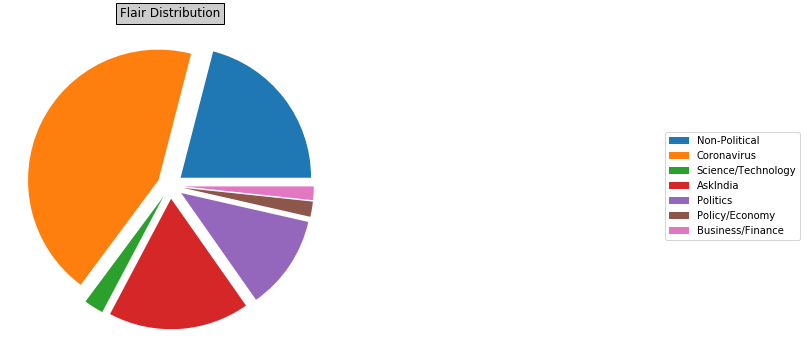

In [5]:
topic_count = Counter(data_tab['flair'])
numbers = [i for w,i in topic_count.items()]
explode = [0.1 for i in range(len(numbers))]
topics = [w for w,i in topic_count.items()]


fig,axs = plt.subplots(figsize=(12,6))
wedges, texts = axs.pie(x = numbers,explode=explode)
axs.legend(wedges, topics,loc="center left",bbox_to_anchor=(2, 0, 0.5, 1))
axs.set_title('Flair Distribution',bbox={'facecolor':'0.8'})
plt.show()

### Bar graph showing number of occurences of each flair

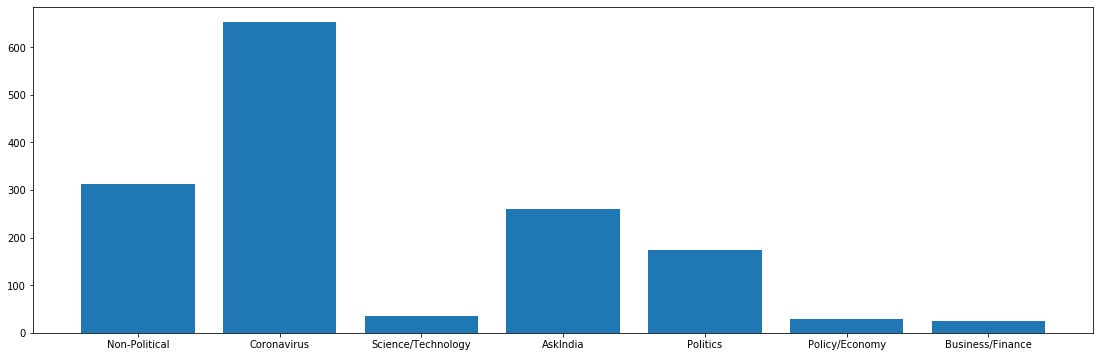

In [6]:
fig, axs = plt.subplots(figsize=(19,6))
axs.bar(topics,numbers)
plt.show()

###  Distribution of no. of words in title

Text(0, 0.5, 'Number of posts')

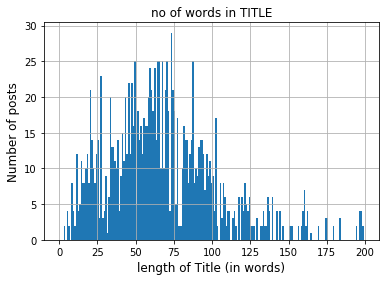

In [7]:
temp = data_tab.title.str.len()
temp.hist(bins = np.arange(0,200,1))
plt.title("no of words in TITLE")
plt.xlabel("length of Title (in words)", fontsize=12)
plt.ylabel("Number of posts", fontsize=12)

### Word cloud for the entire title data

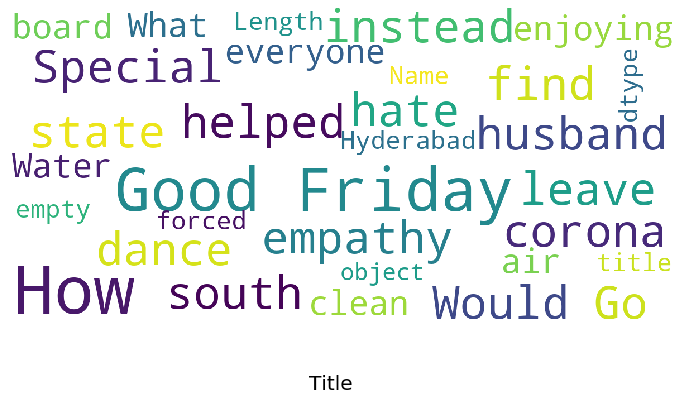

In [8]:
from wordcloud import WordCloud, STOPWORDS
stopwords = set(STOPWORDS)

def show_wordcloud(data, title = None):
    wordcloud = WordCloud(
        background_color='white',
        stopwords=stopwords,
        max_words=200,
        max_font_size=40, 
        scale=3,
        random_state=1 # chosen at random by flipping a coin; it was heads
    ).generate(str(data))

    fig = plt.figure(1, figsize=(12, 12))
    plt.axis('off')
    if title: 
        fig.suptitle(title, fontsize=20)
        fig.subplots_adjust(top=2.3)
    plt.imshow(wordcloud)
    plt.show()

show_wordcloud(data_tab.title,"Title")

### Word cloud of each flair corpus

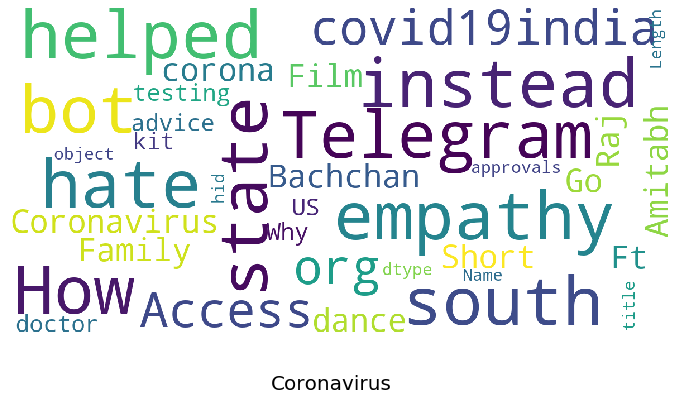

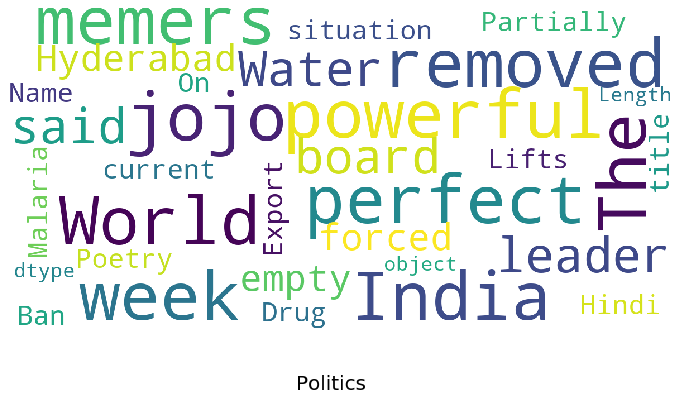

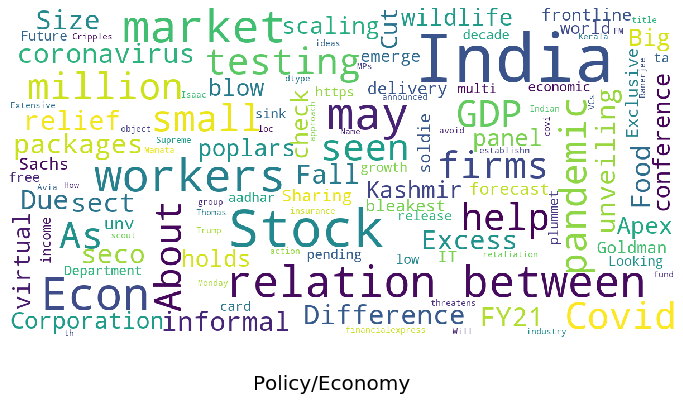

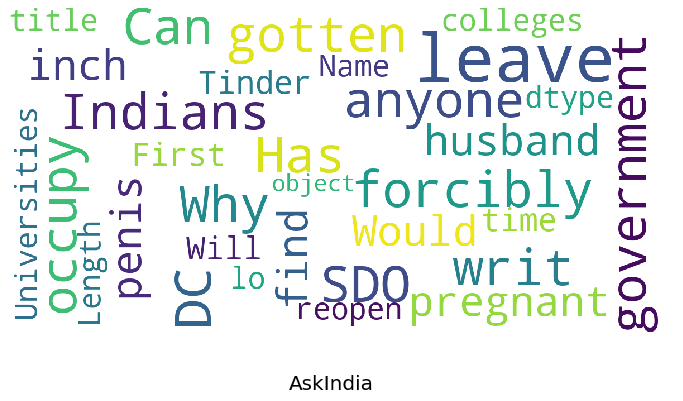

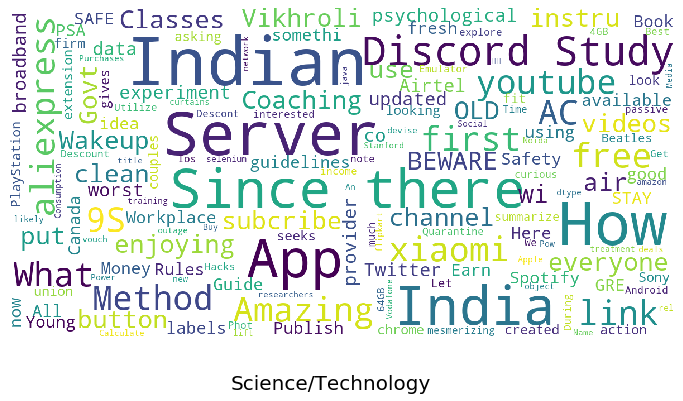

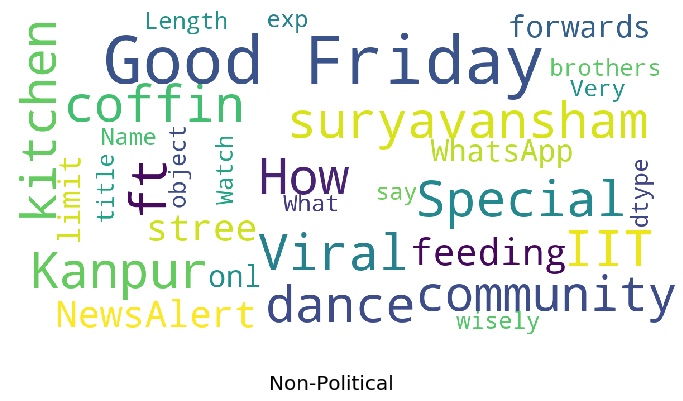

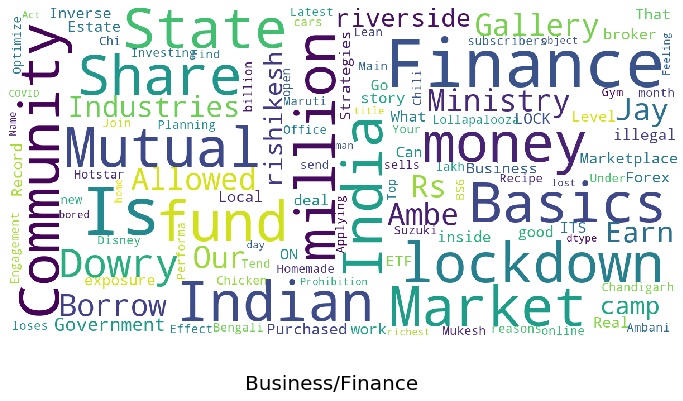

In [9]:
for flair in flairs:
    show_wordcloud(data_tab[data_tab['flair'] == flair]['title'],flair)

### Top 20 Most Frequent Words

In [10]:
from sklearn.feature_extraction.text import CountVectorizer

def get_top_n_words(corpus, n=None):
    vec = CountVectorizer(stop_words = 'english').fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

common_words = get_top_n_words(data_tab['title'], 20)
for word, freq in common_words:
    print(word,"-->", freq)

india --> 299
covid --> 220
19 --> 198
lockdown --> 147
coronavirus --> 133
indian --> 86
help --> 62
people --> 58
news --> 49
jamaat --> 48
pm --> 46
corona --> 44
modi --> 44
government --> 43
govt --> 42
tablighi --> 40
health --> 40
times --> 36
cases --> 36
trump --> 35
